In [1]:
# import library
import numpy as np
import os
import pandas as pd

from sklearn import datasets

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [2]:
np.random.seed(42) # keep the random value constant every time being called

# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (1, 3)]  # sepal width (col 0), petal width (col 1)
y = iris["target"] # 0 (Setosa), 1 (Versicolor), 2 (Virginica)

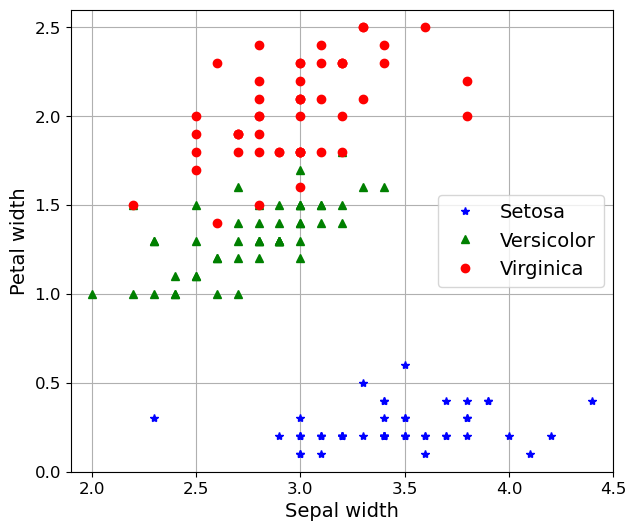

In [4]:
def plot_dataset(X, y, axes): # axes
    plt.plot(X[:, 0][y==0], # col sepal width
             X[:, 1][y==0], # col petal wifth
             "b*", label="Setosa") # label format
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Virginica")

    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("Sepal width", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center right", fontsize=14)

# Just plot the data    
plt.figure(figsize=(7,6))
plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.show()

In [5]:
# Draft for explaining below function
x0s = np.linspace(1.9, 4.5, 3) # Ox range
x1s = np.linspace(0, 2.6, 3) # Oy range
x0, x1 = np.meshgrid(x0s, x1s) # grid with
print(x0,'\n')
print(x1,'\n')
print(np.c_[x0.ravel(), x1.ravel()])

[[1.9 3.2 4.5]
 [1.9 3.2 4.5]
 [1.9 3.2 4.5]] 

[[0.  0.  0. ]
 [1.3 1.3 1.3]
 [2.6 2.6 2.6]] 

[[1.9 0. ]
 [3.2 0. ]
 [4.5 0. ]
 [1.9 1.3]
 [3.2 1.3]
 [4.5 1.3]
 [1.9 2.6]
 [3.2 2.6]
 [4.5 2.6]]


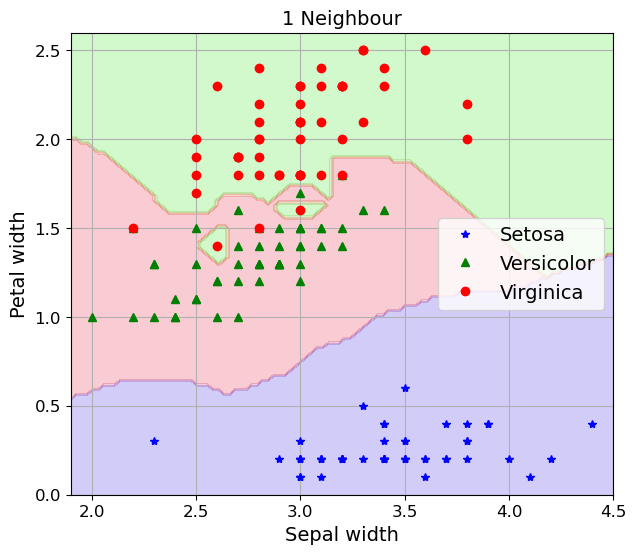

In [6]:
def plot_predictions(clf, axes): # clf: classification name (kNN), axes: range
    x0s = np.linspace(axes[0], axes[1], 100) # Ox range
    x1s = np.linspace(axes[2], axes[3], 100) # Oy range
    x0, x1 = np.meshgrid(x0s, x1s) # above for example
    X = np.c_[x0.ravel(), x1.ravel()] 
    # flatten it in terms of row and the combine together in terms of column
    
    y_pred = clf.predict(X).reshape(x0.shape) 
    # use model to predict all possible (smallest) point that are created by meshgrid
    # and reshape in a square shape
    
    plt.contourf(x0, x1, # dont ravel, put in 2D format, used for location for each value in y_pred
                 y_pred, # value that matches with the location, and show coloring as below expected
                 cmap=plt.cm.brg, alpha=0.2) # color

k = 1
knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)

plt.figure(figsize=(7, 6))

plot_predictions(knn_clf, [1.9, 4.5, 0.0, 2.6]) # function above

plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.title("{} Neighbour".format(k),  fontsize=14)
plt.show()

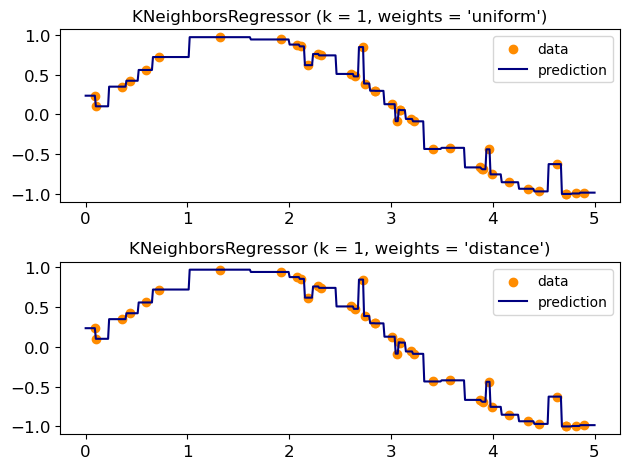

In [7]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8)) # Noise for some particular value only, interval 5

n_neighbors = 1

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    # neighbors.KNeighborsRegressor for continuous values prediction
    # uniform: mean of k nearest value (equally distribution)
    # distance: mean of k nearest value (nearer has more distribution and vice versa)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [78]:
print(np.sort(5 * np.random.rand(5, 1), axis=0), '\n') # Draft for above code
print(np.linspace(0, 5, 5), '\n') # Size (5,) 
print(np.linspace(0, 5, 5)[:, np.newaxis], '\n') # (Size 5x1) Difference here is x1

[[1.57714175]
 [1.81855385]
 [2.19300757]
 [2.85098385]
 [4.94186919]] 

[0.   1.25 2.5  3.75 5.  ] 

[[0.  ]
 [1.25]
 [2.5 ]
 [3.75]
 [5.  ]] 



In [80]:
y_new = np.sin(X).ravel() # Draft for above code
print(y_new, '\n')

y_new[::5] + 1 * (0.5 - np.random.rand(8))

[ 0.09381086  0.10091989  0.34775941  0.4219966   0.55750066  0.65695022
  0.96940081  0.94059723  0.87637482  0.8538402   0.81553704  0.75839099
  0.74075654  0.50756044  0.47689441  0.40518094  0.38713765  0.29682859
  0.29496884  0.12742837  0.08102512  0.05689193  0.05338977 -0.05797992
 -0.08776485 -0.26432971 -0.42082464 -0.66655347 -0.68104667 -0.68968448
 -0.72911815 -0.75404581 -0.85289554 -0.93507411 -0.96803456 -0.99643995
 -0.99997983 -0.99993999 -0.99439521 -0.98371764] 



array([ 0.49176605,  0.94807346,  1.15422753,  0.25207262,  0.32773352,
       -0.23064048, -0.47354374, -0.65540953])

In [82]:
# kNN stuff
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# PCA
from sklearn.decomposition import PCA

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

# other
import timeit
import tracemalloc

In [86]:
mtrain = pd.read_csv("mnist_train.csv", header=0)
mtest = pd.read_csv("mnist_test.csv", header=0)

print('size of training data: ', mtrain.shape)
print('size of test data: ', mtest.shape)

size of training data:  (60000, 785)
size of test data:  (10000, 785)


In [26]:
mtrain.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
digit1 = 3
digit2 = 8
mtrain2 = mtrain.loc[(mtrain['label'] == digit1) | (mtrain['label'] == digit2)] 
mtest2 = mtest.loc[ (mtest['label'] == digit1) | (mtest['label'] == digit2) ]
# dataframe.loc[condition]
# Similar to subset function 
# Look at the condition, only keep the row where the condition is satisfied
# Hence, that only keeps the rows where labels are 3 or 8

In [90]:
mtrain2.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X = mtrain2.drop(mtrain2.columns[0], axis=1) # Drop the "label" column
y = (mtrain2['label'] == digit2).astype(np.float64) # True (1) when 8, False (0) when 3

In [96]:
print(X.head(5), '\n')
print(y.head(5))

    1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
7     0    0    0    0    0    0    0    0    0     0  ...      0      0   
10    0    0    0    0    0    0    0    0    0     0  ...      0      0   
12    0    0    0    0    0    0    0    0    0     0  ...      0      0   
17    0    0    0    0    0    0    0    0    0     0  ...      0      0   
27    0    0    0    0    0    0    0    0    0     0  ...      0      0   

    28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
7       0      0      0      0      0      0      0      0  
10      0      0      0      0      0      0      0      0  
12      0      0      0      0      0      0      0      0  
17      0      0      0      0      0      0      0      0  
27      0      0      0      0      0      0      0      0  

[5 rows x 784 columns] 

7     0.0
10    0.0
12    0.0
17    1.0
27    0.0
Name: label, dtype: float64


In [128]:
print(X.iloc[1,:], '\n') # Series/Pandas type, 1D, size (1)x784. None 1
# dataframe.iloc[indexRow, indexColumn]
print(np.c_[X.iloc[1,:]], '\n') # Numpy type, 2D, size 784x1
print(np.c_[X.iloc[1,:]].reshape(28,28))

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 10, Length: 784, dtype: int64 

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 

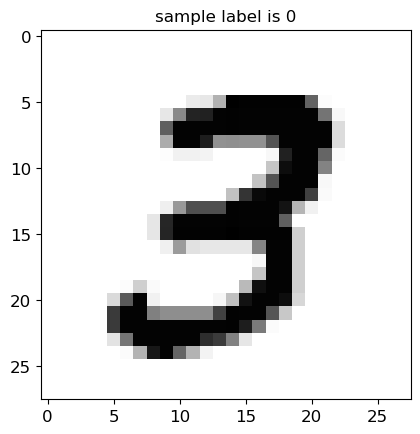

In [132]:
idx = 0 # You can change it to see others
img = np.c_[X.iloc[idx,:]].reshape(28,28) # 784x1 change to 28x28
plt.imshow(img, cmap="Greys")
plt.title(f'sample label is {y.iloc[idx].astype(np.int64)}')
plt.show()

In [144]:
X_test = mtest2.drop(mtest2.columns[0], axis=1) # Delete the 'label' column
y_test = (mtest2['label'] == digit2).astype(np.float64)

In [136]:
k = 3
knn_3_8 = KNeighborsClassifier(n_neighbors = k).fit(X,y) # From cell 53

In [152]:
y_pred = knn_3_8.predict(X_test) # prediction

In [140]:
knn_3_8.classes_

array([0., 1.])

In [189]:
tab1 = confusion_matrix(y_pred, y_test) # row prediction, column actual
print(tab1)
print(accuracy_score(y_test, y_pred)*100)

[[1006   17]
 [   4  957]]
98.94153225806451


In [148]:
sum(y_test) # Number of 8. True (1)

974.0

In [191]:
(y_pred != y_test)

18      False
30      False
32      False
44      False
51      False
        ...  
9967    False
9975    False
9986    False
9991    False
9996    False
Name: label, Length: 1984, dtype: bool

In [154]:
misclass = X_test.loc[y_pred != y_test] # Showing row that satify the condition

In [156]:
misclass

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
print(misclass.iloc[10], '\n') # 11th row in the table. iloc[row_thNUmber]
print(y_test.loc[2393], '\n') # loc[rowNumberName or condition] # actual
print(y_pred[10]) # prediction

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 2393, Length: 784, dtype: int64 

1.0 

0.0


In [166]:
oneMisclass = misclass.iloc[10].values.reshape(1,-1) # can change from 0-21 to see each of them

In [178]:
oneMisclass

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  92, 213, 224, 217, 166,  55,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  74, 177, 254, 254, 202, 160,
        215, 218, 184,  71,  63,  12,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   5, 119

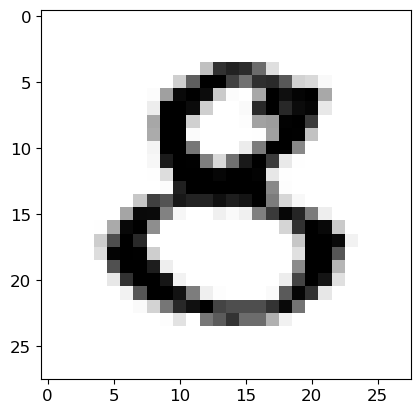

In [168]:
plt.imshow(oneMisclass.reshape(28,28), cmap = "Greys")

In [180]:
knn_3_8.kneighbors(oneMisclass, # array of all features size 1x784
                    n_neighbors = k, # k = 3
                    return_distance = False) # return the index of the neighbors

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[11455,  9255,   767]])

In [182]:
neighbors = knn_3_8.kneighbors(oneMisclass, 
                              n_neighbors = k, # k = 3
                              return_distance = False)[0]
neighbors # index of the neighbors

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([11455,  9255,   767])

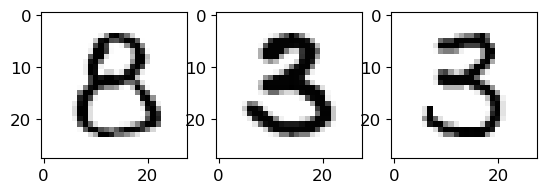

In [184]:
for idx, n in enumerate(neighbors): # enumerate() -> index, value
    plt.subplot(1,3,idx+1) # 1 row 3 column, at the idx+1 spot in 3 spot 
    img = X.iloc[n].values.reshape(28,28) 
    # Put the value (index of the neighbors) into iloc
    # Result is the pandas format of the series
    # .values to change into numpy
    # .reshape() to have desired format
    plt.imshow(img, cmap = "Greys")    

In [192]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, # training set that dropped labels already
                                                            test_size=0.5, # 50-50
                                                            random_state=42) # Give same result every time

k_values = np.arange(1, 12)
results_acc = []

In [194]:
for k in k_values:
    print(f'K = {k}')
    knn_findBest = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_findBest.predict(X_validate)
    acc = accuracy_score(y_validate, y_pred) # accuracy_score(actual, prediction)
    results_acc.append(acc)

K = 1
K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10
K = 11


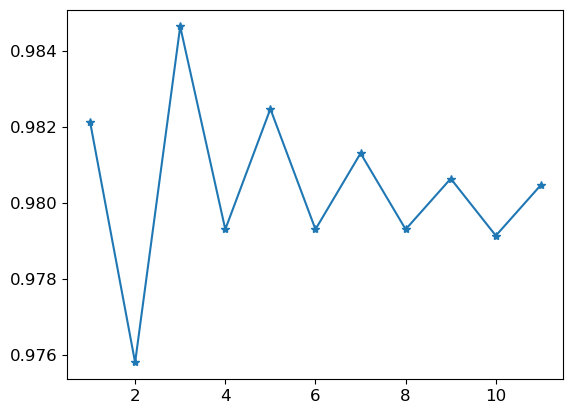

In [195]:
plt.figure
plt.plot(k_values, results_acc, '-*')
plt.show()

In [202]:
print(np.argsort(results_acc)+1) # index of accuracy score from smallest to biggest
print((np.argsort(results_acc)+1)[::-1]) # index of accuracy score from biggest to smallest

[ 2 10  4  6  8 11  9  7  1  5  3]
[ 3  5  1  7  9 11  8  6  4 10  2]
